In [1]:
# Import Libraries 
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Read data
# Считывание файла с информацией
df = pd.read_csv('data/movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Statistic values
# Статистические показатели
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Rows and columns of this dataset
# Количество колонок и строк датасета
df.shape

(10866, 21)

In [4]:
# check each columns number of unique values
# Количество уникальных значений для каждого колонки
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Процесс очистки данных путем заполнения нулевых значений средним значением, а также удаления повторяющихся данных

In [7]:
# Data cleaning process
# Очищение датасета
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# drop unuseful columns 
# Удаление ненужных столбцов
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)  # do not forget inplace 

df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   tagline               8042 non-null   object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
 15  budget_adj         

/tmp/ipykernel_5188/2588789691.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [6]:
# calculate sum of null value for each coloumn
# Подсчет количества нулевых значений для каждого столбца
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Drop null values for each coloumn containing null values
# Удаление нулевых значений для каждого столбца
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            7032 non-null   float64
 1   budget                7032 non-null   int64  
 2   revenue               7032 non-null   int64  
 3   original_title        7032 non-null   object 
 4   cast                  7032 non-null   object 
 5   director              7032 non-null   object 
 6   tagline               7032 non-null   object 
 7   keywords              7032 non-null   object 
 8   runtime               7032 non-null   int64  
 9   genres                7032 non-null   object 
 10  production_companies  7032 non-null   object 
 11  release_date          7032 non-null   object 
 12  vote_count            7032 non-null   int64  
 13  vote_average          7032 non-null   float64
 14  release_year          7032 non-null   int64  
 15  budget_adj          

In [8]:
# to replace all the zero value in coloumn with mean value.
# Нулевые значения заменяем на средние значения для столбца
df['popularity']=df['popularity'].replace(0,df['popularity'].mean())
df['revenue']=df['revenue'].replace(0,df['revenue'].mean())
df['runtime']=df['runtime'].replace(0,df['runtime'].mean())
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [9]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03
mean,0.829463,2.084426e+07,8.339878e+07,104.882895,312.684300,6.013239,1999.383817,3.484685e+07,1.074617e+08
std,1.180185,3.602117e+07,1.330625e+08,23.704753,693.182087,0.876516,13.468216,3.492787e+07,1.631156e+08
min,0.000188,0.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.693980e-01,2.861934e+00
25%,0.278573,0.000000e+00,2.824752e+07,92.000000,24.000000,5.500000,1992.000000,2.037761e+07,3.923478e+07
50%,0.506241,5.000000e+06,5.931630e+07,101.000000,73.000000,6.100000,2003.000000,2.500950e+07,7.643072e+07
75%,0.956217,2.600000e+07,5.931630e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.643072e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# calculate sum of all duplicated value
# Считаем сумму всех дублирующихся значений
df.duplicated().sum()

1

In [11]:
# Drop duplicate value
# Удаление всех дублирующихся значений
df.drop_duplicates(inplace=True)

In [12]:
# calculate sum of all duplicated value
#Считаем сумму всех дублирующихся значений
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb087a6d9a0>,
      dtype=object)

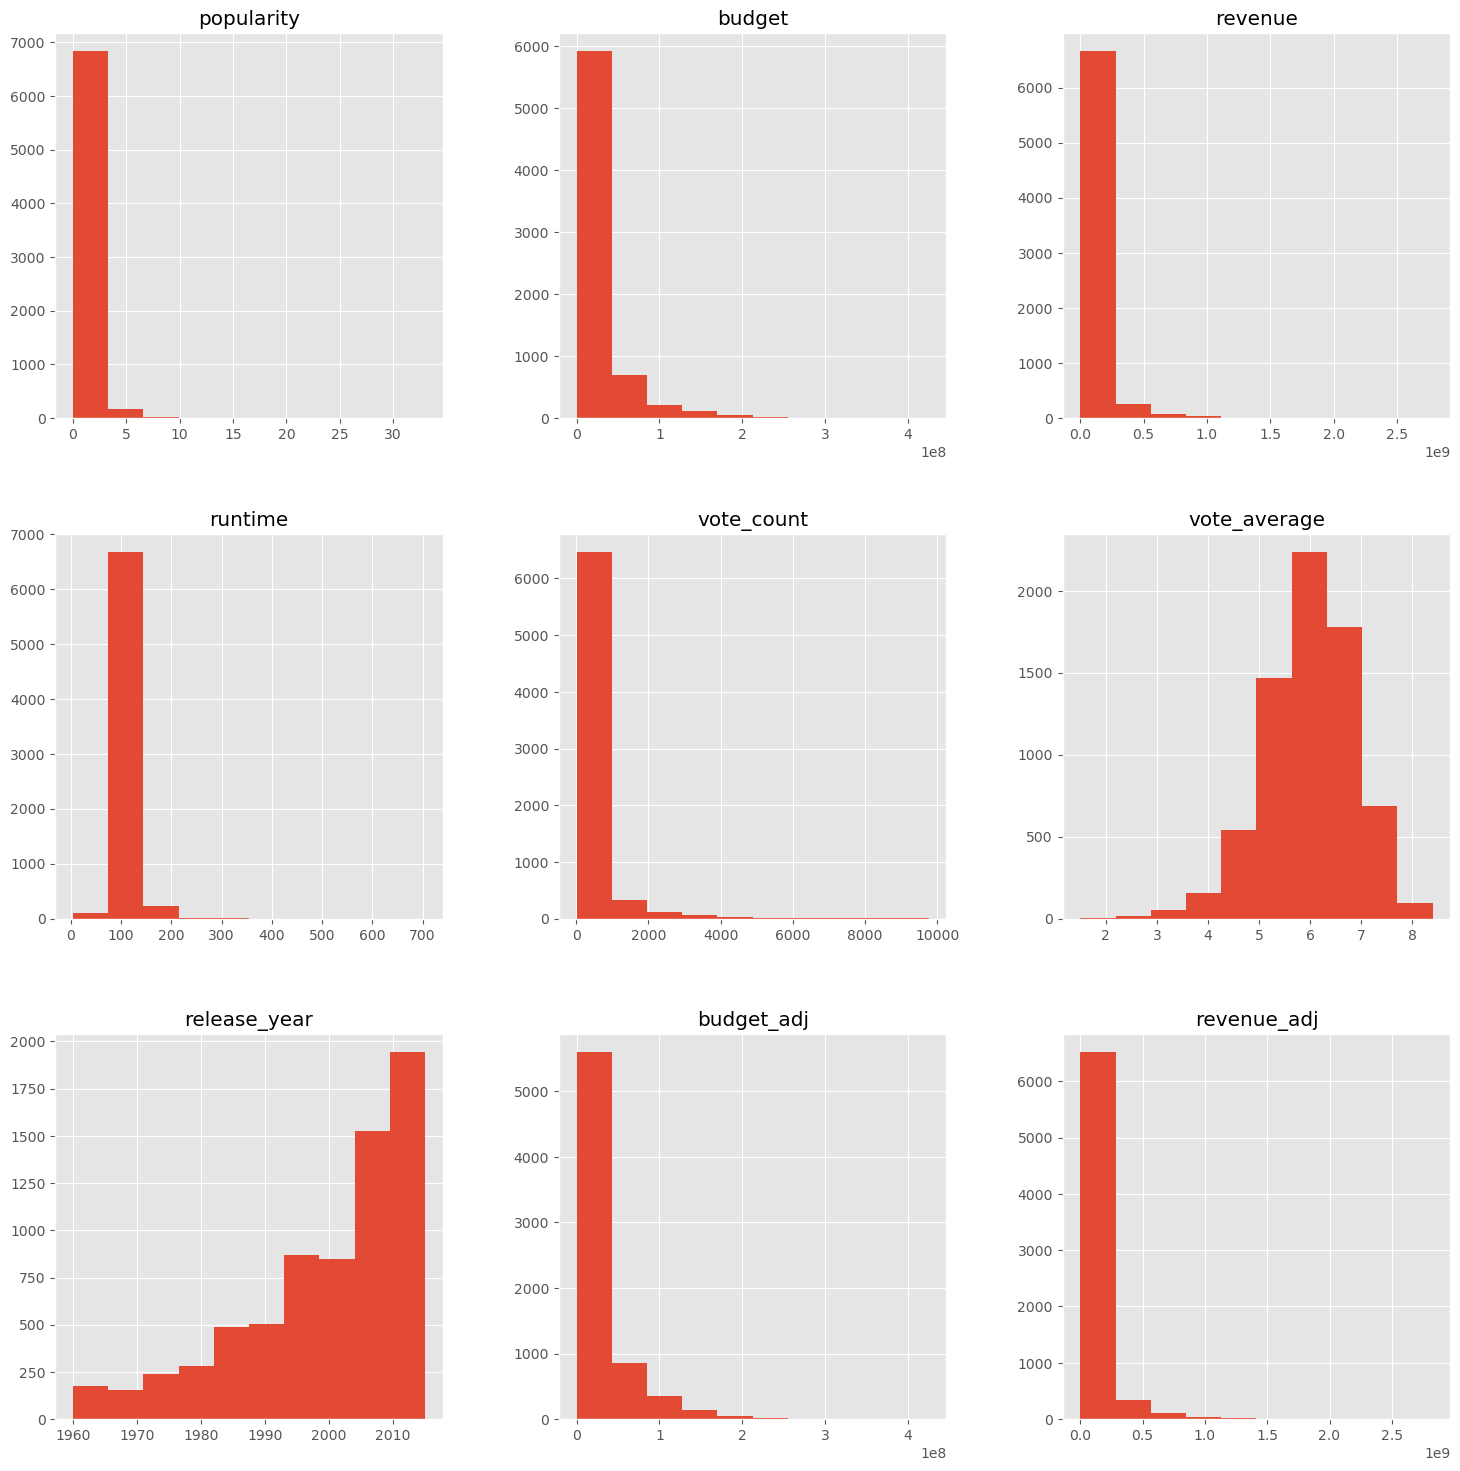

In [18]:
# visulize each variables 
# Визуализация всеъ значений
df.hist(figsize=(18,18))

Проведем анализ данного датафрейма
Вопросы, которые можно задать к данному набору данных:

1) Означает ли больший бюджет большую популярность?

2) Влияет ли дата выхода на подсчет голосов и популярность?

3) Означает ли более большая популярность большую прибыль прибыль?

4) Какие функции ассоциируются с 10 самыми доходными фильмами

Вопрос 1.
Означает ли больший бюджет большую популярность?

Text(0, 0.5, 'Популярность')

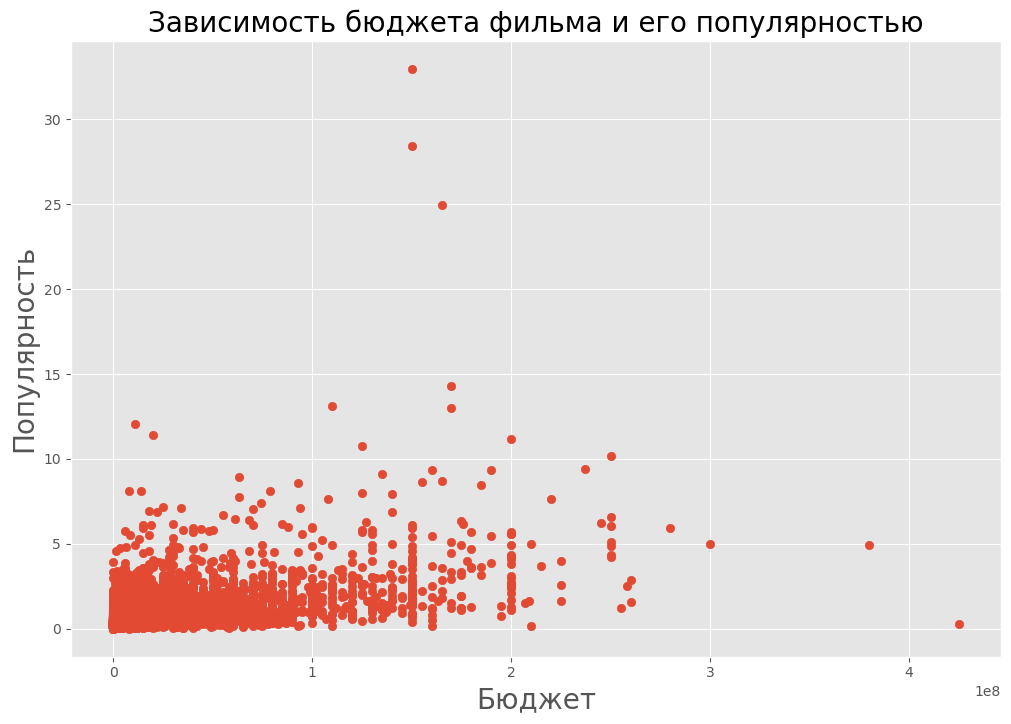

In [14]:
# Plot the relation between budget and popularity 
# Построим график зависимости между бюджетом фильма и его популярностью
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Зависимость бюджета фильма и его популярностью',fontsize=20)
plt.xlabel('Бюджет',fontsize=20)
plt.ylabel('Популярность',fontsize=20)

Исходя из приведенной выше диаграммы, ярковыраженной взаимосвязи между бюджетом и популярностью не наблюдается.
Используем другой метод, чтобы попытаться выявить взаимосвязь между ними.
В этом методе мы делим набор данных на две группы на основе медианы.

In [18]:
# divide the budget into two groups : lesser_cost and more_cost.
# Разделим фильмы по бюджету на две группы по медиане: lesser_cost and more_cost.
med = df['budget'].median()
lesser_cost =  df.query('budget < {}'.format(med))
more_cost =  df.query('budget >= {}'.format(med))

In [19]:
# check lesser cost and more cost  mean values 
# Проверим значения двух групп.
mean_low_budget = lesser_cost['popularity'].mean()
mean_high_budget = more_cost['popularity'].mean()

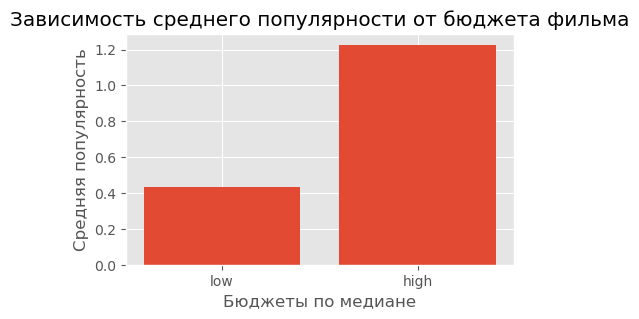

In [37]:
# create a bar chart
# Создадим столбчатую диаграмму
locations = [1,2]
heights = [mean_low_budget , mean_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Зависимость среднего популярности от бюджета фильма')
plt.xlabel('Бюджеты по медиане')
plt.ylabel('Средняя популярность')
plt.rcParams["figure.figsize"] = [6, 3]

In [22]:
increase_percentage = (mean_high_budget - mean_low_budget) / mean_high_budget * 100
increase_percentage

64.89867596270612

Ответ на 1 вопрос:
Из приведенного выше графика можно сделать предварительный вывод, что фильм с более высоким бюджетом в среднем набирают большую популярность.

Почему это может происходить? Несколько гипотез:
1) Фильмы с большим бюджетом имеют значительно большие затраты на маркетинг.

2) В раздел фильмов с большим бюджетов входит большое количество высокобюджетных блокбастеров с большим количеством спецэффектов для массовой аудитории, которая менее требовательна к содержанию и качеству.

3) В раздел фильмов с высоким бюджетом входит большое количество серийных фильмов от крупных студий, что привлекает постоянных фанатов, менее требовательных к качеству продукта




Вопрос 2

Влияет эффект от длительности фильма на среднюю оценку пользователей и популярность?

In [24]:
# There 3 groups with query().  <60 min: lowest   , 60 min <=  <= - 120 min: medium ,  >120 min: highest
# Разделим все фильмы на три группы: Менее 60 мин. от 60 до 120 мин, более 120 мин
lowest =  df.query('runtime < {}'.format(100))
med =  df.query('runtime < {}'.format(200))
highest = df.query('runtime > {}'.format(200))

In [25]:
# check mean popularity of different movie lengths 
# Проверим среднюю популярность фильмов разной продолжительности
mean_of_lowest = lowest['popularity'].mean()
mean_of_med = med['popularity'].mean()
mean_of_highest = highest['popularity'].mean()

Text(0, 0.5, 'Средняя популярность')

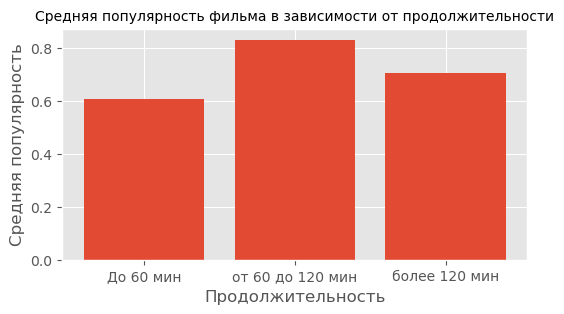

In [52]:
locations = [1,2,3]
heights = [mean_of_lowest, mean_of_med, mean_of_highest]
labels=['До 60 мин','от 60 до 120 мин','более 120 мин']
plt.bar(locations, heights, tick_label = labels)
plt.title('Средняя популярность фильма в зависимости от продолжительности', fontsize=10)
plt.xlabel('Продолжительность')
plt.ylabel('Средняя популярность')

Text(0, 0.5, 'popularity')

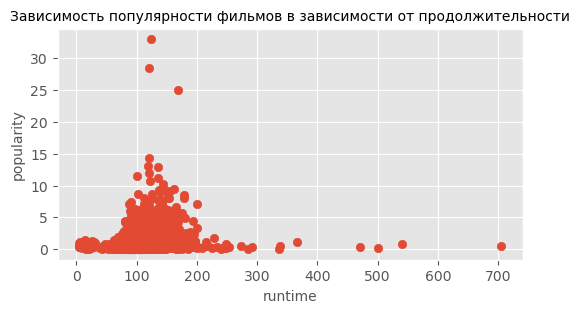

In [45]:
# scatter plot between runtime and popularity 
# Построим график зависимости между продолжительностью и популярностью
x = df['runtime']
y = df['popularity'] 

plt.scatter(x,y)

plt.title('Зависимость популярности фильмов в зависимости от продолжительности',fontsize=10)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

ОТВЕТ НА ВОПРОС 2

Исходя из двух вышеприведенных графиков можно сделать вывод, что наибольшая часть фильмов находится в промежутке от 100 до 200 минут. Если продолжительность фильма более 200 минут, ему труднее становится стать популярным.

Основные гипотезы:

1) На фильмах с продолжительностью более 200 минут, человек устает, притупляет внимание, что смазывает эффект от фильма

2) На фильмах с продолжительностью менее 60 минут, человек ощущает неполноценность фильма, что также смазывает эффект

Вопрос 3.

Означает ли большая популярность большую прибыль?

In [57]:
# calculation for the mean of popularity 
# Посчитаем среднюю популярность
mean = df['popularity'].median()
lowest_popularity =  df.query('popularity < {}'.format(mean))
more_popularity =  df.query('popularity >= {}'.format(mean))

In [58]:
# create a new column called profit.
# Создадим новую колонку "Прибыль"
df['profit'] = df['revenue'] - df['budget']

In [59]:
# average net profit for low_popularity and high_popularity
# Средняя прибыль для категории фильмов с низкой популярностью и высокой популярностью
mean_profit_of_low = lowest_popularity['profit'].mean()
mean_profit_of_high = more_popularity['profit'].mean()
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


Text(0, 0.5, 'Average Profit')

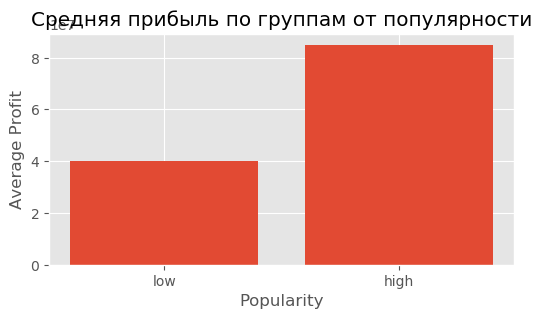

In [61]:
# create a bar chart with the values we get above 
# Создадим столбчатую диаграмму 
locations = [1,2]
heights = [mean_profit_of_low, mean_profit_of_high]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Средняя прибыль по группам от популярности')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')

Ответ на вопрос 3.


Исходя из диаграммы выше можно сделать вывод, что большая популярность влечет за собой большую прибыль

[Text(0.5, 1.0, 'Зависимость буджета фильма и его доходности')]

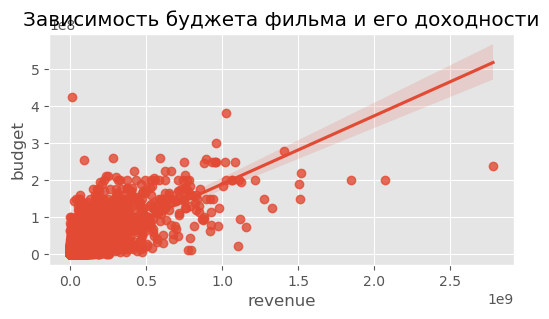

In [39]:
# Plot the relation between budget and revenue
# Построим график между бюджетом фильма и его суммарным доходом

sns.regplot(x="revenue", y="budget", data=df).set(
    title="Зависимость буджета фильма и его доходности")


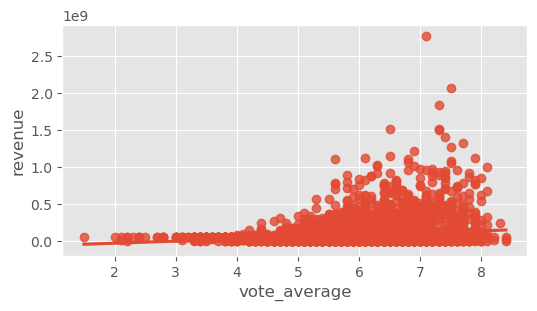

In [40]:
# Plot the relation between average vote on INDB and revenue
# Построим зависимость между средней оценкой на сайте IMDB и доходностью фильма
sns.regplot(x="vote_average", y="revenue", data=df)

In [27]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.521981,0.620542,0.189106,0.798939,0.272979,0.169882,0.446187,0.558669
budget,0.521981,1.000000,0.680162,0.249329,0.618222,0.100464,0.217755,0.931725,0.549733
revenue,0.620542,0.680162,1.000000,0.194727,0.758573,0.183698,0.114165,0.656632,0.905077
runtime,0.189106,0.249329,0.194727,1.000000,0.227319,0.260359,-0.102104,0.272981,0.214272
vote_count,0.798939,0.618222,0.758573,0.227319,1.000000,0.320417,0.182409,0.541537,0.666802
vote_average,0.272979,0.100464,0.183698,0.260359,0.320417,1.000000,-0.128344,0.092007,0.211316
release_year,0.169882,0.217755,0.114165,-0.102104,0.182409,-0.128344,1.000000,0.087748,-0.036631
budget_adj,0.446187,0.931725,0.656632,0.272981,0.541537,0.092007,0.087748,1.000000,0.576029
revenue_adj,0.558669,0.549733,0.905077,0.214272,0.666802,0.211316,-0.036631,0.576029,1.000000


In [28]:
df.corr(method ='kendall')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.428384,0.228062,0.169988,0.649462,0.176485,0.139282,0.235670,0.208774
budget,0.428384,1.000000,0.238871,0.233268,0.479396,0.069091,0.096722,0.394609,0.205490
revenue,0.228062,0.238871,1.000000,0.100917,0.248722,0.066310,0.045608,0.343792,0.851812
runtime,0.169988,0.233268,0.100917,1.000000,0.178425,0.230431,-0.086258,0.214624,0.120229
vote_count,0.649462,0.479396,0.248722,0.178425,1.000000,0.239500,0.185037,0.248452,0.221661
vote_average,0.176485,0.069091,0.066310,0.230431,0.239500,1.000000,-0.074989,0.037464,0.096094
release_year,0.139282,0.096722,0.045608,-0.086258,0.185037,-0.074989,1.000000,-0.009335,-0.055844
budget_adj,0.235670,0.394609,0.343792,0.214624,0.248452,0.037464,-0.009335,1.000000,0.337018
revenue_adj,0.208774,0.205490,0.851812,0.120229,0.221661,0.096094,-0.055844,0.337018,1.000000


In [29]:
df.corr(method ='spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.583602,0.323689,0.248214,0.832429,0.253800,0.199883,0.333650,0.298742
budget,0.583602,1.000000,0.321562,0.320849,0.644635,0.097664,0.128635,0.483527,0.279345
revenue,0.323689,0.321562,1.000000,0.142267,0.351182,0.092173,0.066503,0.441374,0.921418
runtime,0.248214,0.320849,0.142267,1.000000,0.260047,0.325089,-0.125409,0.298138,0.170202
vote_count,0.832429,0.644635,0.351182,0.260047,1.000000,0.343166,0.266373,0.351094,0.318084
vote_average,0.253800,0.097664,0.092173,0.325089,0.343166,1.000000,-0.107502,0.051965,0.134094
release_year,0.199883,0.128635,0.066503,-0.125409,0.266373,-0.107502,1.000000,-0.017824,-0.076437
budget_adj,0.333650,0.483527,0.441374,0.298138,0.351094,0.051965,-0.017824,1.000000,0.433190
revenue_adj,0.298742,0.279345,0.921418,0.170202,0.318084,0.134094,-0.076437,0.433190,1.000000


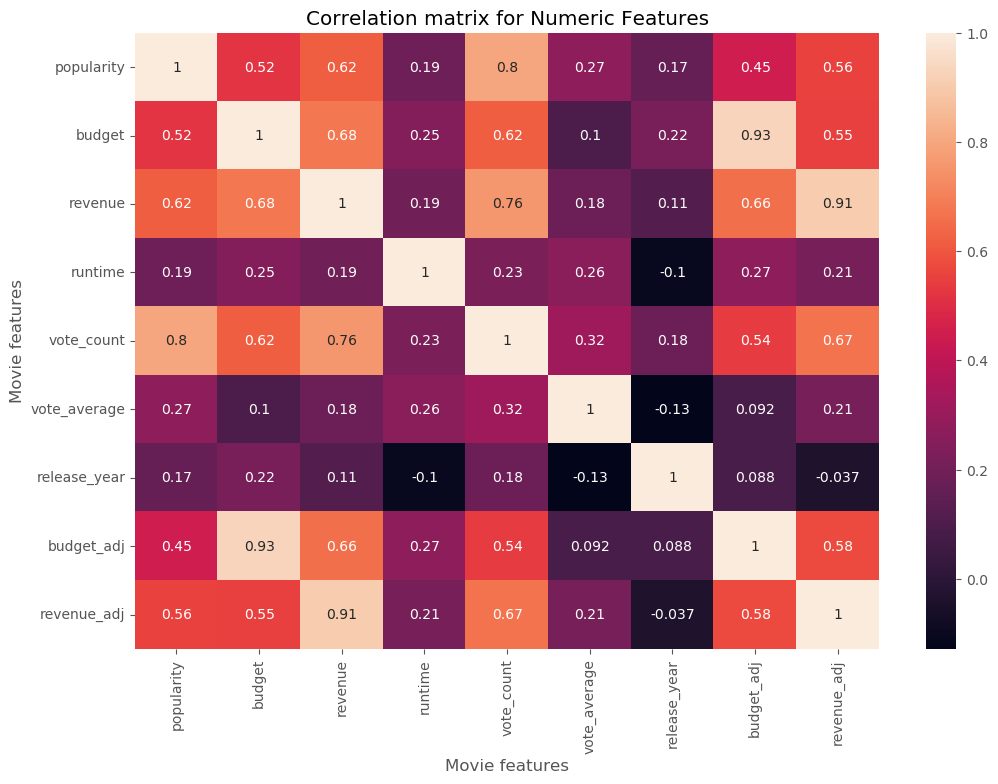

In [30]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [31]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.111008,0.457490,0.966941,0.996822,0.566711,0.994257,0.967159,0.040695,0.287740,0.692044,0.997050,0.066433,-0.038589,0.962186,0.469516,0.472934
budget,0.111008,1.000000,0.148287,0.103607,0.109736,0.034947,0.110284,0.115041,0.048450,0.038522,0.113084,0.110455,0.101794,-0.026846,0.105201,0.410967,0.155343
revenue,0.457490,0.148287,1.000000,0.447487,0.456697,0.069484,0.457021,0.457471,-0.007334,0.140155,0.272348,0.455151,0.332980,-0.104188,0.407897,0.606212,0.983968
original_title,0.966941,0.103607,0.447487,1.000000,0.967922,0.549433,0.965783,0.939573,0.043098,0.275801,0.672088,0.967504,0.066230,-0.032546,0.928754,0.458247,0.461694
cast,0.996822,0.109736,0.456697,0.967922,1.000000,0.569305,0.995230,0.968496,0.038931,0.286422,0.693121,0.998007,0.062112,-0.037200,0.963047,0.469250,0.472152
director,0.566711,0.034947,0.069484,0.549433,0.569305,1.000000,0.566847,0.537180,0.055102,0.169880,0.418886,0.566065,-0.149262,0.059229,0.540678,0.112615,0.084331
tagline,0.994257,0.110284,0.457021,0.965783,0.995230,0.566847,1.000000,0.965562,0.038990,0.285731,0.689330,0.995524,0.064024,-0.037605,0.961367,0.467442,0.472456
keywords,0.967159,0.115041,0.457471,0.939573,0.968496,0.537180,0.965562,1.000000,0.037369,0.286110,0.669618,0.969111,0.076306,-0.046039,0.938024,0.469885,0.473194
runtime,0.040695,0.048450,-0.007334,0.043098,0.038931,0.055102,0.038990,0.037369,1.000000,0.064285,0.045203,0.041013,0.060784,-0.010837,0.042378,0.039263,-0.000035
genres,0.287740,0.038522,0.140155,0.275801,0.286422,0.169880,0.285731,0.286110,0.064285,1.000000,0.206607,0.286750,0.069549,-0.006561,0.272350,0.158161,0.145558


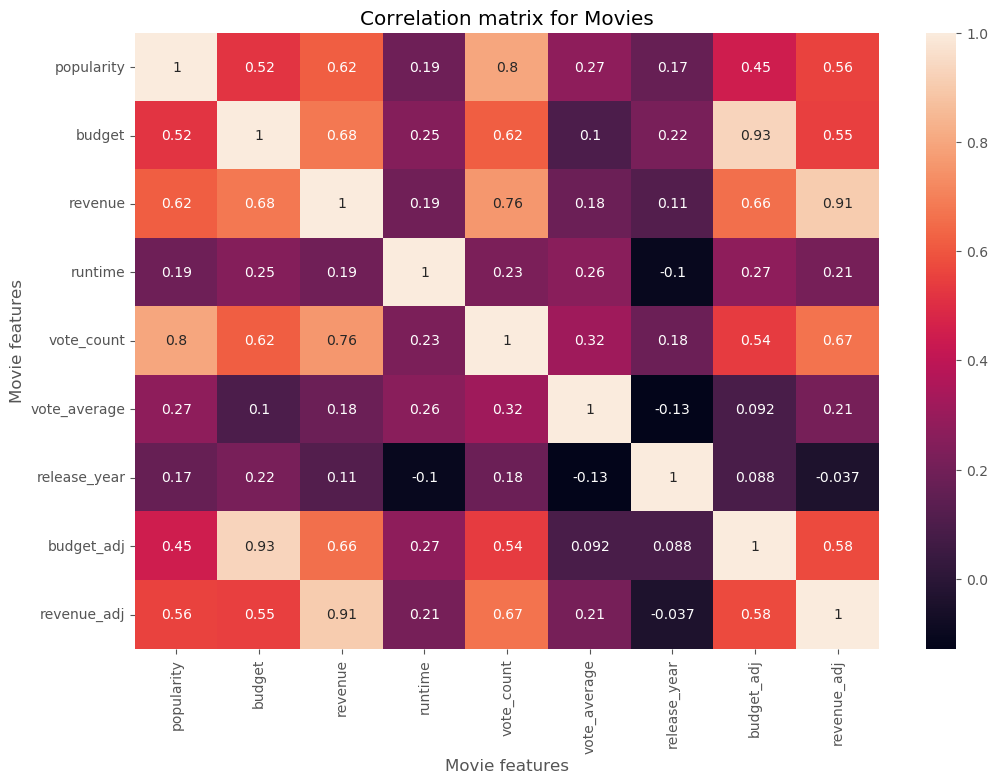

In [32]:
orrelation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [33]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

popularity   popularity        1.000000
             budget            0.111008
             revenue           0.457490
             original_title    0.966941
             cast              0.996822
                                 ...   
revenue_adj  vote_count        0.329484
             vote_average     -0.105170
             release_year      0.428333
             budget_adj        0.620843
             revenue_adj       1.000000
Length: 289, dtype: float64


In [34]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

director        vote_count       -0.149262
vote_count      director         -0.149262
vote_average    vote_count       -0.137741
vote_count      vote_average     -0.137741
revenue_adj     vote_average     -0.105170
                                    ...   
original_title  original_title    1.000000
revenue         revenue           1.000000
budget          budget            1.000000
budget_adj      budget_adj        1.000000
revenue_adj     revenue_adj       1.000000
Length: 289, dtype: float64


In [38]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs.head(30)

director              keywords                0.537180
keywords              director                0.537180
release_year          director                0.540678
director              release_year            0.540678
                      original_title          0.549433
original_title        director                0.549433
release_date          director                0.566065
director              release_date            0.566065
                      popularity              0.566711
popularity            director                0.566711
tagline               director                0.566847
director              tagline                 0.566847
                      cast                    0.569305
cast                  director                0.569305
revenue               budget_adj              0.606212
budget_adj            revenue                 0.606212
revenue_adj           budget_adj              0.620843
budget_adj            revenue_adj             0.620843
production

In [40]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('production_companies')[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('revenue', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies
Paramount Pictures                                    9997308616
Walt Disney Pictures|Pixar Animation Studios          7707874816
DreamWorks Animation                                  6828401666
Marvel Studios                                        6395906747
Columbia Pictures                                     5891695335
Universal Pictures                                    5801639821
Walt Disney Pictures                                  3890236007
Warner Bros.                                          3850851671
Walt Disney Pictures|Walt Disney Animation Studios    3498726837
Universal Pictures|Illumination Entertainment         3203800871
Twentieth Century Fox Film Corporation                3167270700
Blue Sky Studios|Twentieth Century Fox Animation      3052133385
New Line Cinema                                       2965441327
Touchstone Pictures                                   2886828861
Walt Disney Pictures|Walt Disney Feature Animation    2822005296
Name

In [41]:
df.groupby(['production_companies', 'release_year'])[["revenue"]].sum()

,,revenue
production_companies,release_year,
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures,2012,5.931630e+07
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative,2013,5.931630e+07
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,2011,1.378000e+03
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,2013,1.745788e+08
1492 Pictures|Warner Bros.|Heyday Films,2001,9.764756e+08
...,...,...
nu image films|Active Entertainment|Equity Pictures Medienfonds GmbH & Co. KG III,2006,5.931630e+07
the filmgroup,1963,5.931630e+07
thinkfilm|Starz Entertainment|Candy Heart Productions,2006,5.931630e+07


In [42]:
CompanyGrossSum = df.groupby(['production_companies'])[["revenue"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['revenue','production_companies'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['revenue'].astype('int64') 

CompanyGrossSumSorted

production_companies
Paramount Pictures                                    9997308616
Walt Disney Pictures|Pixar Animation Studios          7707874816
DreamWorks Animation                                  6828401666
Marvel Studios                                        6395906747
Columbia Pictures                                     5891695335
Universal Pictures                                    5801639821
Walt Disney Pictures                                  3890236007
Warner Bros.                                          3850851671
Walt Disney Pictures|Walt Disney Animation Studios    3498726837
Universal Pictures|Illumination Entertainment         3203800871
Twentieth Century Fox Film Corporation                3167270700
Blue Sky Studios|Twentieth Century Fox Animation      3052133385
New Line Cinema                                       2965441327
Touchstone Pictures                                   2886828861
Walt Disney Pictures|Walt Disney Feature Animation    2822005296
Name

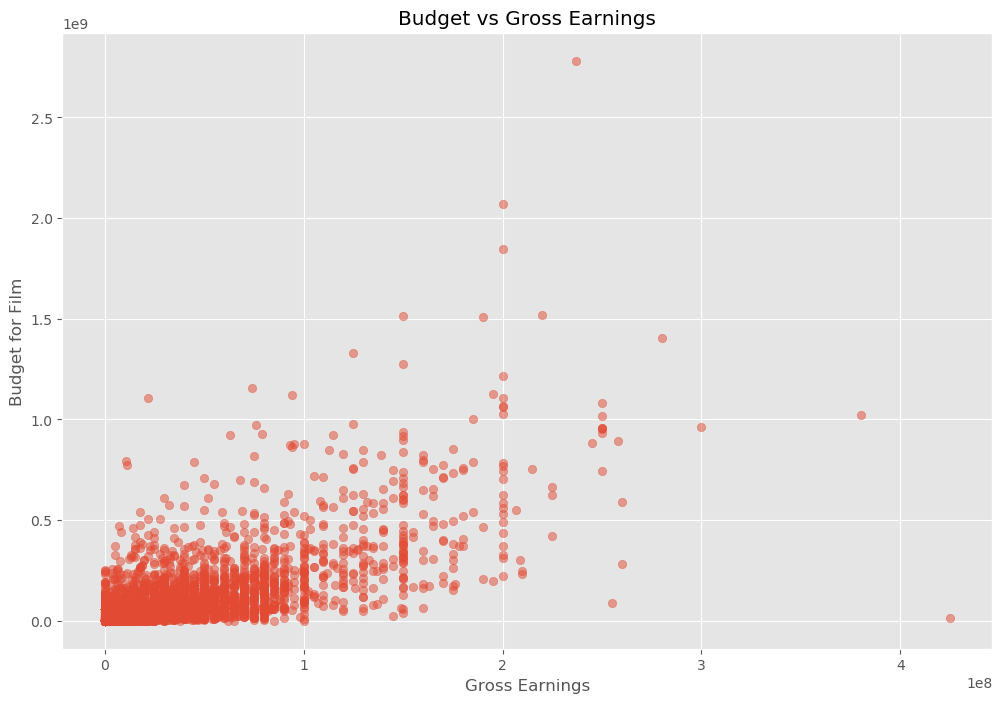

In [43]:
plt.scatter(x=df['budget'], y=df['revenue'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [45]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1.513529e+09,2834,1112,549,5303,3953,124.0,94,4912,3374,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,3.784364e+08,3189,6595,1036,6379,2488,120.0,94,4991,2641,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,2.952382e+08,2673,6072,2604,3736,585,119.0,465,4082,1991,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2.068178e+09,4683,2374,1202,1456,245,136.0,93,2503,1234,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1.506249e+09,2067,6740,1271,6238,1078,137.0,180,4802,2238,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,0.317824,0,5.931630e+07,5981,897,2248,2494,1362,126.0,698,4184,2819,11,5.5,1966,2.500950e+07,7.643072e+07
10860,0.087034,0,5.931630e+07,1051,3769,1054,1064,3950,87.0,544,3458,2751,13,7.0,1966,2.500950e+07,7.643072e+07
10862,0.065543,0,5.931630e+07,2193,2679,1494,1109,1075,176.0,45,712,1360,20,5.7,1966,2.500950e+07,7.643072e+07
10864,0.064317,0,5.931630e+07,6656,6385,3157,6260,5758,80.0,110,429,908,22,5.4,1966,2.500950e+07,7.643072e+07


In [46]:
df_numerized.corr(method='pearson')

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.521981,0.620542,0.011363,-0.002286,-0.007468,0.007258,-0.013551,0.189106,-0.080403,0.079110,-0.009517,0.798939,0.272979,0.169882,0.446187,0.558669
budget,0.521981,1.000000,0.680162,0.039468,0.003938,0.017290,0.016864,-0.011495,0.249329,-0.171035,0.087670,-0.004271,0.618222,0.100464,0.217755,0.931725,0.549733
revenue,0.620542,0.680162,1.000000,0.026884,0.022398,0.002269,0.006612,-0.006023,0.194727,-0.108678,0.075013,-0.006386,0.758573,0.183698,0.114165,0.656632,0.905077
original_title,0.011363,0.039468,0.026884,1.000000,-0.009179,0.016829,0.018572,0.009255,0.043090,0.017495,0.012149,-0.005168,0.029186,0.051012,-0.034427,0.039661,0.026826
cast,-0.002286,0.003938,0.022398,-0.009179,1.000000,0.035016,0.009129,0.003934,-0.005685,-0.022558,0.028648,-0.001934,-0.002306,0.021554,-0.026462,0.013148,0.036692
director,-0.007468,0.017290,0.002269,0.016829,0.035016,1.000000,0.013126,-0.001936,0.034187,0.006509,0.002530,0.009250,-0.000210,0.019605,-0.038258,0.023105,0.018543
tagline,0.007258,0.016864,0.006612,0.018572,0.009129,0.013126,1.000000,0.006531,-0.009111,-0.009766,0.007385,-0.002688,0.014898,-0.013623,-0.003526,0.015857,0.010740
keywords,-0.013551,-0.011495,-0.006023,0.009255,0.003934,-0.001936,0.006531,1.000000,0.004776,0.014114,0.008729,-0.003282,-0.007028,-0.011797,-0.017612,-0.001373,-0.001070
runtime,0.189106,0.249329,0.194727,0.043090,-0.005685,0.034187,-0.009111,0.004776,1.000000,-0.007349,0.020143,-0.021699,0.227319,0.260359,-0.102104,0.272981,0.214272
genres,-0.080403,-0.171035,-0.108678,0.017495,-0.022558,0.006509,-0.009766,0.014114,-0.007349,1.000000,-0.050845,-0.025525,-0.090870,-0.024330,0.035963,-0.182891,-0.106741


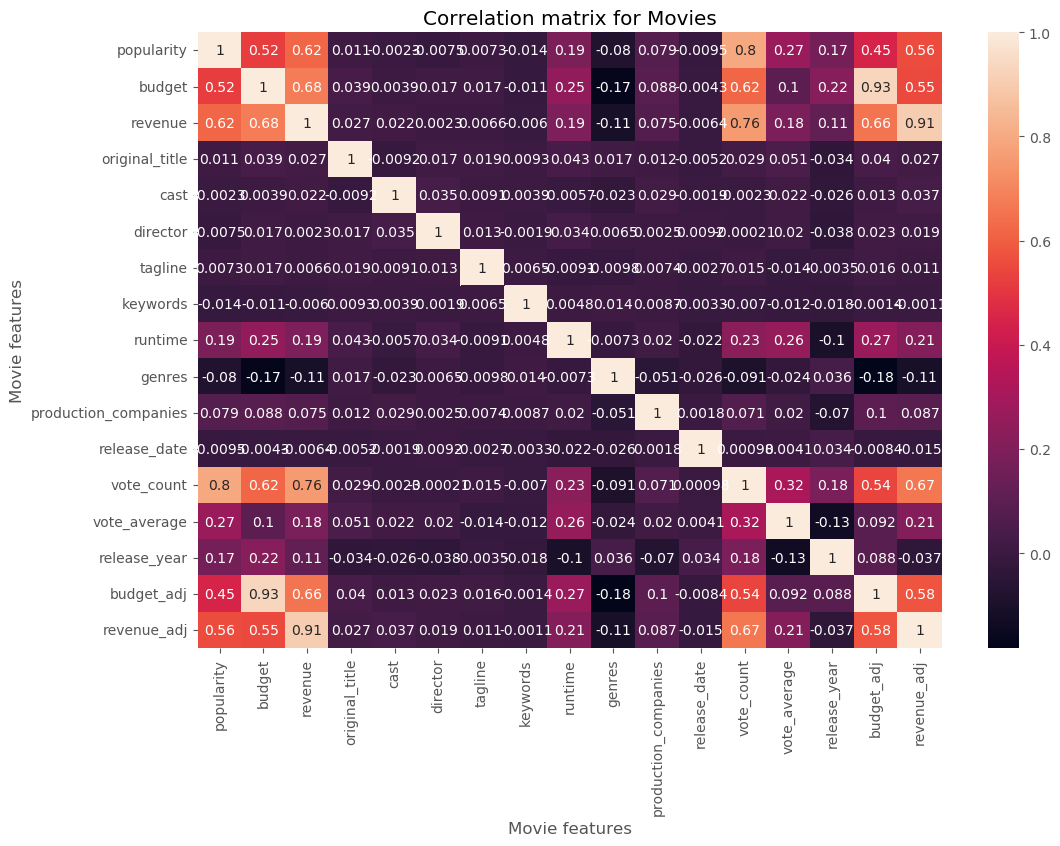

In [47]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [48]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [50]:
df

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1.513529e+09,2834,1112,549,5303,3953,124.0,94,4912,3374,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,3.784364e+08,3189,6595,1036,6379,2488,120.0,94,4991,2641,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,2.952382e+08,2673,6072,2604,3736,585,119.0,465,4082,1991,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2.068178e+09,4683,2374,1202,1456,245,136.0,93,2503,1234,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1.506249e+09,2067,6740,1271,6238,1078,137.0,180,4802,2238,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,0.317824,0,5.931630e+07,5981,897,2248,2494,1362,126.0,698,4184,2819,11,5.5,1966,2.500950e+07,7.643072e+07
10860,0.087034,0,5.931630e+07,1051,3769,1054,1064,3950,87.0,544,3458,2751,13,7.0,1966,2.500950e+07,7.643072e+07
10862,0.065543,0,5.931630e+07,2193,2679,1494,1109,1075,176.0,45,712,1360,20,5.7,1966,2.500950e+07,7.643072e+07
10864,0.064317,0,5.931630e+07,6656,6385,3157,6260,5758,80.0,110,429,908,22,5.4,1966,2.500950e+07,7.643072e+07
